In [4]:
import os
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns ,sklearn,gensim
from nltk.corpus import stopwords
from collections import  Counter
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Ali-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
with open('AQAD-master/AQQAD 1.0/FINAL_AAQAD-v1.0.json','rb') as f:
  data = json.load(f)


for allData in data['data']:
    print(allData['title']+"\n")
    print(allData['paragraphs'])
    break


بيونسيه

[{'qas': [{'question': 'متى بدأت بيونسي تصبح شعبية؟', 'id': 1, 'answers': [{'text': 'في أواخر التسعينات', 'answer_start': 220}], 'is_impossible': False}, {'question': 'ما هي المجالات التي تنافس عليها بيونسيه عندما كانت تكبر؟', 'id': 2, 'answers': [{'text': 'غناء ورقص', 'answer_start': 173}], 'is_impossible': False}, {'question': 'متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟', 'id': 3, 'answers': [{'text': '(2003)،', 'answer_start': 515}], 'is_impossible': False}, {'question': 'في أي مدينة و ولاية نشأت بيونسيه؟', 'id': 4, 'answers': [{'text': 'هيوستن بولاية تكساس،', 'answer_start': 88}], 'is_impossible': False}, {'question': 'في أي عقد أصبحت بيونسي مشهورة؟', 'id': 5, 'answers': [{'text': 'أواخر التسعينات', 'answer_start': 223}], 'is_impossible': False}, {'question': 'في أي مجموعة R&B كانت هي المغنية الرئيسية؟', 'id': 6, 'answers': [{'text': 'دستنيز تشايلد', 'answer_start': 290}], 'is_impossible': False}, {'question': 'ما الألبوم الذي جعلها فنانة معروفة عالميا؟', 'id': 7, 'ans

#DATA ANALYSIS

In [6]:
rows = []
for entry in data['data']:
    title = entry['title']
    for paragraph in entry['paragraphs']:
        for qa in paragraph['qas']:
            question = qa['question']
            answer = qa['answers']
            is_impossible = qa['is_impossible']
            rows.append((title, question, answer, is_impossible))
df = pd.DataFrame(rows, columns=['title', 'question', 'answer', 'is_impossible'])
df.head()

,title,question,answer,is_impossible
0,بيونسيه,متى بدأت بيونسي تصبح شعبية؟,"[{'text': 'في أواخر التسعينات', 'answer_start'...",False
1,بيونسيه,ما هي المجالات التي تنافس عليها بيونسيه عندما ...,"[{'text': 'غناء ورقص', 'answer_start': 173}]",False
2,بيونسيه,متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟,"[{'text': '(2003)،', 'answer_start': 515}]",False
3,بيونسيه,في أي مدينة و ولاية نشأت بيونسيه؟,"[{'text': 'هيوستن بولاية تكساس،', 'answer_star...",False
4,بيونسيه,في أي عقد أصبحت بيونسي مشهورة؟,"[{'text': 'أواخر التسعينات', 'answer_start': 2...",False


In [19]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 17911
Number of columns: 4


In [20]:
unique_titles = df['title'].unique()
print('Unique titles:', unique_titles)

Unique titles: ['بيونسيه' 'آي بود' 'ذا ليجند أوف زيلدا: توايلايت برينسس'
 'طيف (فيلم 2015)' 'نيويورك' 'طاقة شمسية' 'كانييه ويست' 'بوذية'
 'أمريكان آيدول' 'كلب' 'جمهورية الكونغو' 'رئيس الوزراء' 'واي باك مشين'
 'إضاءة' 'عمارة' 'أرنولد شوارزنيجر' 'هرطقة' 'مادية' 'مسيحيون'
 'سوني للترفيه الموسيقي' 'الصيد وجمع الثمار' 'صندوق الأمم المتحدة للسكان'
 'ألكسندر غراهام بيل' 'مزود خدمة الإنترنت' 'قصص مصورة' 'سانت هيلينا'
 'زفر (صوتيات)' 'هيدروجين' 'سباق الفضاء' 'متصفح ويب'
 'نظام بايدو للملاحة بالأقمار الصناعية' 'قانون كنسي' 'اللغة الكتالونية'
 'بوسطن' 'يونيفرسال بيكشرز' 'ورق' 'توقيت صيفي'
 'إدارة الأرشيف والوثائق الوطنية' 'تريستان دا كونا' 'جامعة كانساس' 'برن'
 'ساوثهامبتون' 'معاهدة' 'جوزيف بروز تيتو' 'جزر مارشال' 'الألب' 'جين'
 'غينيا بيساو' 'دماغ' 'تلفاز عالي الدقة' 'خشب' 'العصور الوسطى' 'حاسوب'
 'العرق الأسود' 'ذي تايمز' 'هجرة الطيور' 'علم المناعة' 'إم بي 3' 'هيوستن'
 'نحاس' 'هوية' 'اتصال' 'عنب' 'أمن الحاسوب' 'حيوان' 'جعة' 'دولار أمريكي'
 'هانوفر' 'شعور' 'نادي إيفرتون' 'حاملة طائرات' 'إدارة ال

In [21]:
#topic entries
df['title'].value_counts()

يونانيون                   345
العصور الوسطى              288
أكسجين                     285
جمال عبد الناصر            270
الإمبراطورية البريطانية    250
                          ... 
فريدريش فون هايك             3
دومينيكانية                  3
الألب                        3
سانت هيلينا                  3
حيدر آباد                    3
Name: title, Length: 297, dtype: int64

<AxesSubplot:title={'center':'Question count by title'}, xlabel='title'>

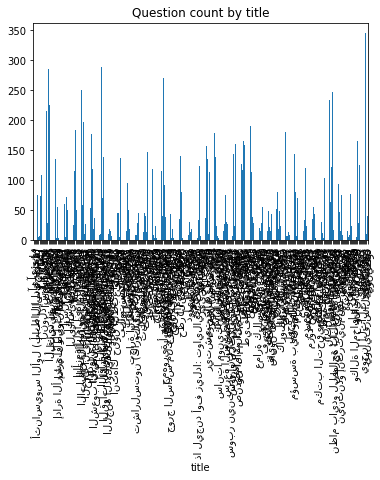

In [24]:
question_count = df.groupby('title')['question'].count()
question_count.plot(kind='bar', title='Question count by title')

In [32]:
df = df[df['answer'].str.len() > 0]


In [65]:
df['answer'].apply(lambda x: x[0]['text'])

0                                       في أواخر التسعينات
1                                                غناء ورقص
2                                                  (2003)،
3                                     هيوستن بولاية تكساس،
4                                          أواخر التسعينات
                               ...                        
17906                                              الأفلام
17907                                               بثلاثة
17908                       الشاي وعصير القصب والعرقسوس من
17909                                         الفول المدمس
17910    والأرز باللبن والعاشوراء والمهلبية والكِشك وال...
Name: answer, Length: 11493, dtype: object

In [66]:
df['question']

0                              متى بدأت بيونسي تصبح شعبية؟
1        ما هي المجالات التي تنافس عليها بيونسيه عندما ...
2           متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟
3                        في أي مدينة و ولاية نشأت بيونسيه؟
4                           في أي عقد أصبحت بيونسي مشهورة؟
                               ...                        
17906    في أكثر من 100 عام ، كم عدد الأفلام التي تم إن...
17907                     ما هي حصة الإنتاج العربي من مصر؟
17908                                          ما هو كشري؟
17909                             ما يمكن إضافته إلى كشري؟
17910                 ما الفاصوليا المستخدمة لصنع الفلافل؟
Name: question, Length: 11493, dtype: object

In [33]:
avg_question_length = df['question'].str.len().mean()
avg_answer_length = df['answer'].apply(lambda x: len(x[0]['text'])).mean()
print('Average question length:', avg_question_length)
print('Average answer length:', avg_answer_length)

Average question length: 49.19707648133647
Average answer length: 22.312364047681196


<AxesSubplot:>

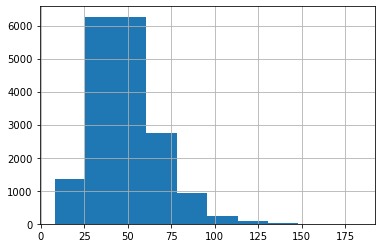

In [7]:
#the number of characters present in each question
df['question'].str.len().hist()

<AxesSubplot:>

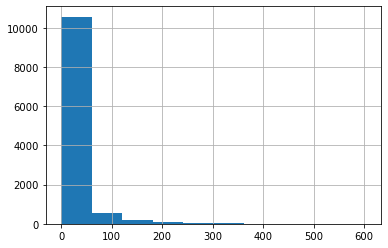

In [64]:
#the number of characters present in each answer
df['answer'].apply(lambda x: x[0]['text']).str.len().hist()

<AxesSubplot:>

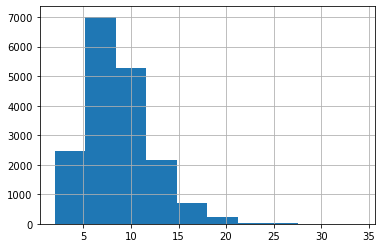

In [8]:
#number of words appearing in each question
df['question'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

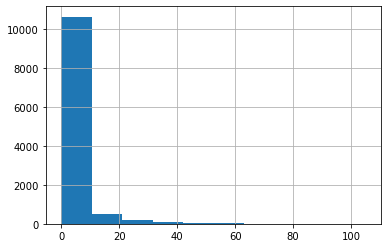

In [67]:
df['answer'].apply(lambda x: x[0]['text']).str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

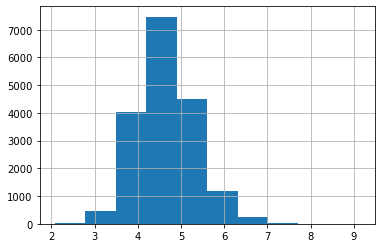

In [9]:
#average word length in each question
df['question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

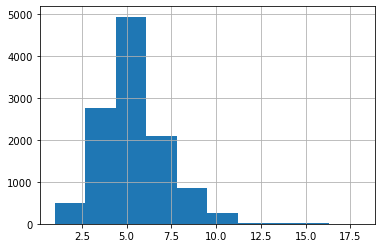

In [68]:
df['answer'].apply(lambda x: x[0]['text']).str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [10]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

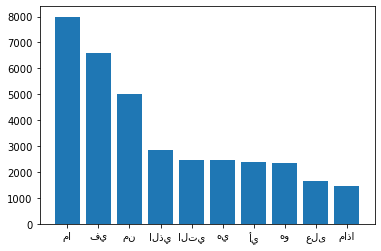

In [11]:
stop=set(stopwords.words('arabic'))
corpus=[]
question= df['question'].str.split()
question=question.values.tolist()
corpus=[word for i in question for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
plot_top_stopwords_barchart(df['question'])
#We can evidently see that stopwords such as “ما”,” في” and “من” dominate in questions.

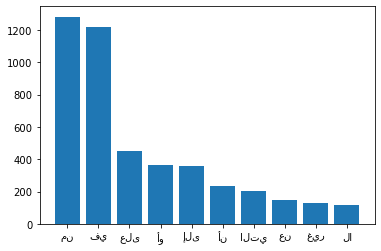

In [69]:
plot_top_stopwords_barchart(df['answer'].apply(lambda x: x[0]['text']))

<AxesSubplot:>

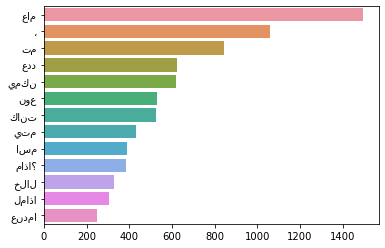

In [12]:
#inspect which words other than these stopwords occur frequently
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [13]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

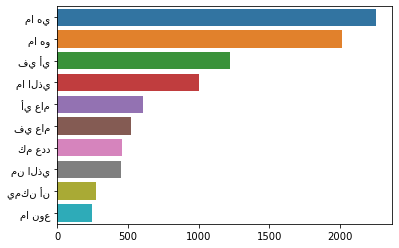

In [14]:
top_n_bigrams=get_top_ngram(df['question'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

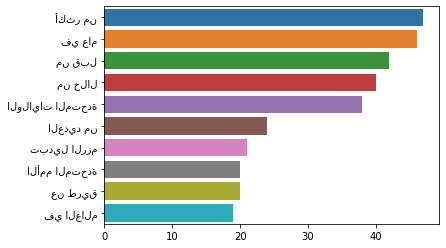

In [70]:
top_n_bigrams=get_top_ngram(df['answer'].apply(lambda x: x[0]['text']),2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

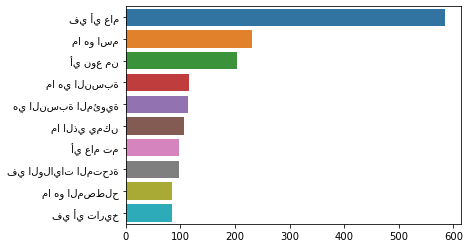

In [15]:
top_tri_grams=get_top_ngram(df['question'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

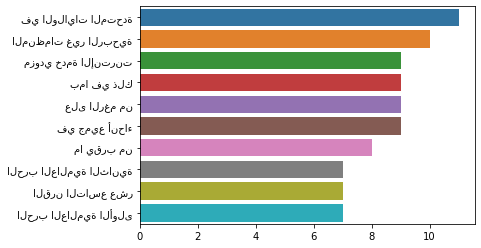

In [71]:
top_tri_grams=get_top_ngram(df['answer'].apply(lambda x: x[0]['text']),n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Read


In [13]:
def read_data(path):
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    # initialize lists for contexts, questions, and answers
    contexts = []
    questions = []
    answers = []
    # iterate through all data in squad data
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                if 'plausible_answers' in qa.keys():
                    access = 'plausible_answers'
                else:
                    access = 'answers'
                for answer in qa['answers']:
                    # append data to lists
                    contexts.append(context)
                    questions.append(question)
                    answers.append(answer)
    # return formatted data lists
    return contexts, questions, answers


In [15]:
contexts, questions, answers = read_data('AQAD-master/AQQAD 1.0/FINAL_AAQAD-v1.0.json')
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_contexts, val_contexts, train_questions, val_questions, train_answers, val_answers = train_test_split(contexts, questions, answers, test_size=0.1, random_state=42)

In [16]:
display(train_questions[0:3])
display(train_answers[0:3])
display(train_contexts[0:3])

['ما الذي تم بناء استاد فرنسا من أجله؟',
 'كيف ألقاب الجماعة درع لديه أرسنال؟',
 'في أي اتجاه يُنشر الخشب في كثير من الأحيان بحيث تظهر عقدة كدائرة صلبة تتدفق الحبوب حولها؟']

[{'text': 'كأس العالم لكرة القدم', 'answer_start': 187},
 {'text': '2014،', 'answer_start': 919},
 {'text': 'الألواح بطول 366 سم وبعرض', 'answer_start': 9}]

['يوجد في باريس العديد من الملاعب المخصصة لمختلف أنواع الرياضات. يعدّ ملعب فرنسا الذي يتسع لأكثر من 80 ألف متفرج أكبر ملاعب البلاد، وكان قد بني هذا الملعب الواقع في منطقة سان دينس لاستضافة كأس العالم لكرة القدم 1998 والذي حازت عليه فرنسا للمرة الأولى في تاريخها. يستخدم الملعب لممارسة كرة القدم، والرجبي، وألعاب القوى. يستضيف الملعب مباريات منتخب فرنسا الوطني للرجبي سنوياً في بطولة الأمم الستة. وكذلك يستضيف مباريات منتخب فرنسا لكرة القدم الودية وتصفيات البطولات الكبرى. بالإضافة إلى نادي باريس سان جيرمان، تملك المدينة نوادي كرة قدم أخرى مثل: نادي باريس، والنجم الأحمر ونادي فرنسا.\n',
 'شهد عام 2006 نجاحا للأرسنال على المستوى الأوروبي حيث تأهل للمرة الأولى في تاريخيه إلى المباراة النهائية لدوري أبطال أوروبا التي أقيمت في العاصمة الفرنسية باريس وجمعت الأرسنال مع نادي برشلونة الإسباني وكان الأرسنال قريبا من تحقيق لقبه الأوروبي الأول بعد أن أنهى الشوط الأول بتقدمه بهدف سجله مدافعه الإنجليزي سول كامبل. لكن أحلامهم في الحصول على اللقب تبددت بعد أن تمكن النادي الإسباني من قلب النتيجة لصالحه بتسج

In [6]:
display(val_questions[0:3])
display(val_answers[0:3])
display(val_contexts[0:3])

['ما هي البكتيريا التي تسبب عدوى السل؟',
 'ما هي البكتيريا التي تسبب مرض الحمى التي رصدت في جبال روكي؟',
 'كم من السكان الأصليين بالقرب من ولاية ماساتشوستس لقوا حتفهم بسبب الجدري في الوباء بين عامي 1617 و 1619؟']

[{'text': 'السل', 'answer_start': 89},
 {'text': 'أنواع', 'answer_start': 706},
 {'text': '30% من الأمريكيين الأصليين القاطنين في', 'answer_start': 512}]

['من المُقدّر أن حوالي 5 - 10٪ من غير المُصابين بفيروس نقص المناعة البشرية والمصابين بعدوى السل سيصبح مرضهم نشطًا خلال حياتهم وفي المقابل، فإن 30٪ من المُصابين بفيروس نقص المناعة البشرية سيصبح مرضهم نشطًا. قد يُصيب السل أي جزء من الجسم، ولكن إصابته للرئتين تُعتبر الأكثر شيوعًا (وهو ما يُعرف باسم السل الرئوي). يحدث السل خارج الرئوي عندما يتطور مرض السل خارج الرئتين. قد يتشارك السل خارج الرئوي مع السل الرئوي أيضًا  تشمل العلامات والأعراض العامة الحمى والقشعريرة والتعرق الليلي وفقدان الشهية وفقدان الوزن والتعب،  وقد يحدث تعجّر الأصابع الواضح أيضًا.\n',
 'يمتلك كل نوع من الأمراض مميزات خاصة به تمكنه من التفاعل مع مستقبلاته في الجسم البشري. فبعض الكائنات الحية مثل المكورات العقدية يمكن أن تسبب الالتهابات الجلدية، والالتهاب الرئوي، والسحايا، وتسمم الدم حيث ينتج صدمة فتتوسع وتتضخم الأوعية مما يسبب الموت. مع ذلك فإن هذه الكائنات الحية هي أيضا جزء من الإنسان، وعادةً ما تتواجد على الجلد أو في الأنف من دون أن تسبب أي مرض على الإطلاق. وهناك كائنات أخرى دائماً تسبب الأمراض لدى البشر مثل الريكتسية و

# Prepare

In [7]:
def add_end_idx(answers, contexts):
    # loop through each answer-context pair
    for answer, context in zip(answers, contexts):
        # gold_text refers to the answer we are expecting to find in context
        gold_text = answer['text']
        # we already know the start index
        start_idx = answer['answer_start']
        # and ideally this would be the end index...
        end_idx = start_idx + len(gold_text)

        # ...however, sometimes squad answers are off by a character or two
        if context[start_idx:end_idx] == gold_text:
            # if the answer is not off :)
            answer['answer_end'] = end_idx
        else:
            for n in [1, 2]:
                if context[start_idx-n:end_idx-n] == gold_text:
                    # this means the answer is off by 'n' tokens
                    answer['answer_start'] = start_idx - n
                    answer['answer_end'] = end_idx - n

In [8]:
add_end_idx(train_answers, train_contexts)
add_end_idx(val_answers, val_contexts)

In [9]:
#loop over train answers and train contexts and make sure that they match
def check_answers_contexts_match(answers, contexts, questions, show_anamolies=False):
    
    answers_without_answer_end_key =0
    non_matching_answers=0
    for answer, context, question in zip(answers, contexts, questions):
        
        #check if context has key answer_end and if not 
        if 'answer_end' not in answer.keys():
            answers_without_answer_end_key +=1
            if show_anamolies:
                print(question)
                print(answer)
                print(context[answer['answer_start']:answer['answer_start']+ len(answer['text'])+1])
            continue 

        #check if answer matches context
        if context[answer['answer_start']:answer['answer_end']] != answer['text']:
            non_matching_answers +=1
    display('answers without answer_end key:', answers_without_answer_end_key,'non matching answers:', non_matching_answers)
    
check_answers_contexts_match(train_answers, train_contexts, train_questions)
check_answers_contexts_match(val_answers, val_contexts, val_questions)

'answers without answer_end key:'

35

'non matching answers:'

0

'answers without answer_end key:'

6

'non matching answers:'

0

# Encode

In [10]:
from transformers import DistilBertTokenizerFast
disilbert_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [11]:
%pip install arabert
from transformers import AutoTokenizer
# from arabert.preprocess_arabert import never_split_tokens, preprocess
arabert_tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabert", do_lower_case=False, do_basic_tokenize=True)

You should consider upgrading via the 'c:\Users\kewi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [12]:
def show_encoding_of(sentence, tokenizer):
    encoding = tokenizer(sentence)
    print(sentence)
    print(encoding)
    print('length of encoding:', len(encoding['input_ids']))
    for i in encoding['input_ids']:
        #print the decoding of it
        print(i,':',tokenizer.decode([i]))

In [13]:
test_text = "الألواح الخشبية تعالج بعد ذلك في أفران للتحميص حتى لا تتأثر مستقبلاً بتغييرات درجات الحرارة أو الرطوبة الموجودة في الجو"
show_encoding_of(test_text, arabert_tokenizer)

الألواح الخشبية تعالج بعد ذلك في أفران للتحميص حتى لا تتأثر مستقبلاً بتغييرات درجات الحرارة أو الرطوبة الموجودة في الجو
{'input_ids': [29756, 445, 27375, 7800, 445, 27960, 1007, 980, 33864, 3161, 4312, 781, 30353, 113, 1001, 27671, 8259, 3842, 818, 32967, 29759, 91, 53212, 7797, 4179, 7797, 445, 7874, 7804, 980, 402, 445, 988, 28626, 980, 445, 54052, 980, 781, 445, 7866, 29758], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
length of encoding: 42
29756 : [CLS]
445 : ال
27375 : ##ألو
7800 : ##اح
445 : ال
27960 : ##خشب
1007 : ##ي
980 : ##ة
33864 : تعالج
3161 : بعد
4312 : ذلك
781 : في
30353 : أفران
113 : ل
1001 : ##ل
27671 : ##تحم
8259 : ##يص
3842 : حتى
818 : لا
32967 : تتأثر
29759 : [UNK]
91 : ب
53212 : ##تغيير
7797 : ##ات
4179 : درج
7797 : ##ات


In [14]:
show_encoding_of(test_text, disilbert_tokenizer)

الألواح الخشبية تعالج بعد ذلك في أفران للتحميص حتى لا تتأثر مستقبلاً بتغييرات درجات الحرارة أو الرطوبة الموجودة في الجو
{'input_ids': [101, 1270, 23673, 25573, 23673, 29836, 25573, 29820, 1270, 23673, 29821, 29825, 29816, 14498, 19433, 1273, 29830, 25573, 23673, 29819, 1271, 29830, 15394, 1279, 23673, 29835, 1291, 14498, 1270, 29833, 17149, 18511, 1294, 23673, 29817, 29820, 22192, 14498, 29826, 1276, 29817, 29837, 1294, 25573, 1273, 29817, 25573, 29818, 17149, 1295, 29824, 29817, 29834, 29816, 23673, 25573, 1271, 29817, 29831, 14498, 14498, 17149, 25573, 29817, 1278, 17149, 29819, 25573, 29817, 1270, 23673, 29820, 17149, 25573, 17149, 19433, 1270, 29836, 1270, 23673, 17149, 29828, 29836, 29816, 19433, 1270, 23673, 22192, 29836, 29819, 29836, 15394, 19433, 1291, 14498, 1270, 23673, 29819, 29836, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [15]:
tokenizer = arabert_tokenizer
train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
val_encodings = tokenizer(val_contexts, val_questions, truncation=True, padding=True)

In [16]:
def add_token_positions(encodings, answers):
    # initialize lists to contain the token indices of answer start/end
    start_positions = []
    end_positions = []
    for i in range(len(answers)):
        # append start/end token position using char_to_token method
        
        # old
        # start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
        # end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))
        # Mine mah, lol I am sure it must work
        start_positions.append(encodings.char_to_token(i, answers[i].get('answer_start', None)))
        end_positions.append(encodings.char_to_token(i, answers[i].get('answer_end', None)))

        # if start position is None, the answer passage has been truncated
        if start_positions[-1] is None:
            start_positions[-1] = tokenizer.model_max_length
        # end position cannot be found, char_to_token found space, so shift one token forward
        go_back = 1
        print(end_positions[-1])
        while end_positions[-1] is None:
            end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end']-go_back)
            go_back +=1
    # update our encodings object with the new token-based start/end positions
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

# apply function to our data
add_token_positions(train_encodings, train_answers)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
2
None
None
None
None
None
None
None
None
None
150
None
None
None
123
None
None
None
198
None
None
None
20
None
None
None
None
None
None
None
None
None
144
None
None
None
None
None
136
None
None
None
None
40
None
None
None
None
None
148
None
None
None
None
None
None
213
None
None
None
201
None
None
None
158
140
133
61
None
None
None
None
None
None
None
None
None
None
None
None
54
None
None
None
None
None
80
None
83
None
None
None
None
None
None
None
None
None
58
None
None
None
None
None
None
None
105
None
None
37
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
18
None
160
None
None
None
None
None
None
None
None
None
None
19
None
None
None
None
None
None
108
None
None
None
None
None
None
None
None
None
None
68
None
None
None
None
121
None
None
None
None
None
None
None
None
None
None
None
None
None


In [18]:
train_encodings['start_positions'][0:100]

[58,
 310,
 3,
 150,
 5,
 24,
 94,
 4,
 93,
 16,
 78,
 83,
 66,
 71,
 143,
 108,
 110,
 85,
 22,
 31,
 14,
 167,
 74,
 388,
 5,
 39,
 1,
 56,
 34,
 115,
 272,
 2,
 107,
 4,
 99,
 61,
 117,
 19,
 13,
 204,
 52,
 143,
 30,
 101,
 70,
 5,
 45,
 70,
 1,
 197,
 8,
 49,
 2,
 18,
 246,
 18,
 93,
 74,
 129,
 54,
 67,
 26,
 117,
 141,
 35,
 82,
 6,
 92,
 8,
 133,
 11,
 24,
 16,
 352,
 39,
 17,
 120,
 32,
 15,
 149,
 145,
 253,
 13,
 77,
 31,
 21,
 28,
 212,
 72,
 66,
 68,
 200,
 6,
 225,
 7,
 153,
 137,
 128,
 58,
 144]